### Moving Average (MA) Model

In [48]:
import pandas as pd, numpy as np
import matplotlib.pyplot as plt
from pandas.plotting import register_matplotlib_converters
from statsmodels.graphics.tsaplots import plot_acf, plot_pacf
from statsmodels.tsa.stattools import acf, pacf
from statsmodels.tsa.arima.model import ARIMA
from datetime import datetime, timedelta
register_matplotlib_converters()

#### Generate Data

$y_t=50+0.4\cdot\varepsilon_{t-1}+0.3\cdot\varepsilon_{t-2}+\varepsilon_t,~~~\varepsilon_t\sim\mathcal{N}(0,1)$

In [49]:
errors = np.random.normal(0, 1, 400) # 400 errors

In [50]:
date_index = pd.date_range(start='9/1/2019', end='1/1/2020')

In [51]:
mu = 50
series = []
for t in range(1, len(date_index) + 1):
    series.append(mu + 0.4 * errors[t-1] + 0.3 * errors[t-2] + errors[t])

In [52]:
series = pd.Series(series, date_index)
series = series.asfreq(pd.infer_freq(series.index))

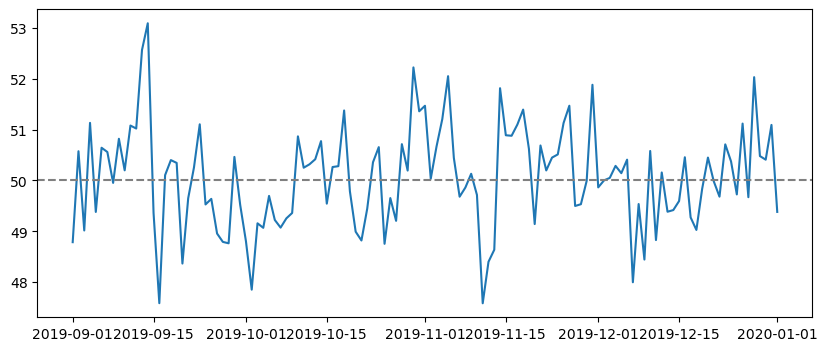

In [53]:
plt.figure(figsize=(10,4))
plt.plot(series)
plt.axhline(mu, linestyle='--', color='grey');

In [ ]:
def calc_corr(series, lag):
    return pearsonr()

#### ACF

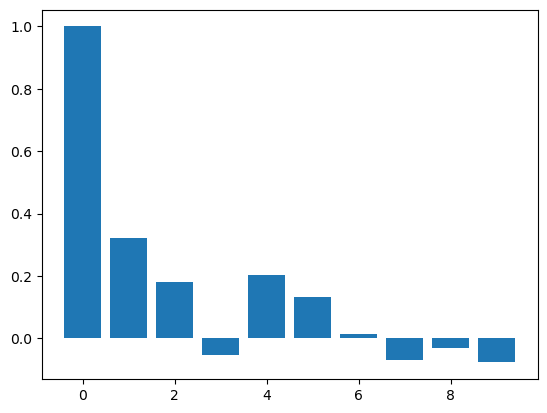

In [54]:
acf_vals = acf(series)
num_lags = 10
plt.bar(range(num_lags), acf_vals[:num_lags]);

Use MA-2 model in this case.

#### PACF

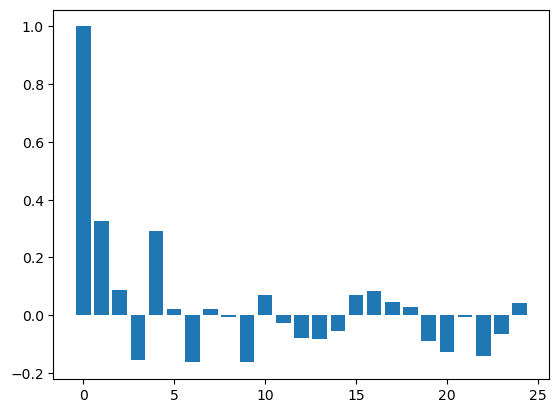

In [55]:
pacf_vals = pacf(series, nlags=25)
num_lags = 25
plt.bar(range(num_lags), pacf_vals[:num_lags]);

Alternating and diminishing over time => evidence for Moving Average process.

#### Get training and testing sets

In [56]:
train_end = datetime(2019, 12, 30)
test_end = datetime(2020, 1, 1) # only two periods (days) will be predicted

s_train = series[:train_end]
s_test = series[train_end + timedelta(days=1):test_end]

#### Fit MA Model

Once the order of the MA model is defined, only that many periods in the future can be predicted. After that, the constant mean will be predicted.

In [57]:
ma_model = ARIMA(s_train, order=(0,0,2))

In [58]:
ma_fit = ma_model.fit()

In [59]:
print(ma_fit.summary())

                               SARIMAX Results                                
Dep. Variable:                      y   No. Observations:                  121
Model:                 ARIMA(0, 0, 2)   Log Likelihood                -161.107
Date:                Wed, 11 Sep 2024   AIC                            330.214
Time:                        20:54:16   BIC                            341.398
Sample:                    09-01-2019   HQIC                           334.756
                         - 12-30-2019                                         
Covariance Type:                  opg                                         
                 coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------
const         50.0436      0.156    319.942      0.000      49.737      50.350
ma.L1          0.5012      0.076      6.562      0.000       0.351       0.651
ma.L2          0.3773      0.074      5.106      0.0

Constant is close to mean, coefficients are close to the true values and all are statistically significant.

**Predicted Model**:
<br>
$\hat{y}_t=50+0.50\cdot\varepsilon_{t-1}+0.38\cdot\varepsilon_{t-2}$